# Shape Matching
This script matches the shapes between a geometry extracted from the historical map and its current counterpart with the aim to define control points for a subsequent georeferencing. Here, an example is shown based on the geometry of the *St. Katharinen Kirche*.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import rasterio.features
import shapely
import warnings

from IPython.display import Image
from osgeo import gdal
from PIL import Image
from shapely.geometry import MultiPoint, Point

In [3]:
# for anonymized version
warnings.filterwarnings("ignore", category=rasterio.errors.NotGeoreferencedWarning)

# 1) Import data
historical as well as current dataset

In [5]:
# (Historical) Public buildings
historical_publicbuildings = gpd.read_file("data\\Historical_PublicBuildings_polygonized.shp") # WGS84

In [6]:
# Current churches
current_churches = gpd.read_file("data\\Current_Churches.shp") # UTM

# 2) Extract single churches
from both datasets and plot them

## 2.1) St.-Katharinen-Kirche

In [8]:
# Current St.-Katharinen-Kirche
StKatharinen_current = current_churches[current_churches["name"] == "St.-Katharinen-Kirche"]
StKatharinen_current

,fid,identifier,beginnt,advStandar,gebaeudefu,anzahlDerO,grundflaec,grundfla_1,AX_Datener,dachform,...,baujahr,dachart,bauweise,weitereGeb,AX_LI_Proc,CharacterS,CI_RoleCod,lageZurErd,sourceFile,geometry
178,214282.0,urn:adv:oid:DEHHALKAJ0000pO5,2014-03-10T06:32:11Z,DLKM,3041,3,2372.0,urn:adv:uom:m2,NaN,5000.0,...,1967,None,NaN,None,None,NaN,None,None,ALKIS_HH_0122.xml,"POLYGON ((565855.580 5933463.313, 565855.251 5..."


In [9]:
# Historical St.-Katharinen-Kirche
StKatharinen_historical = historical_publicbuildings.loc[[6],'geometry']

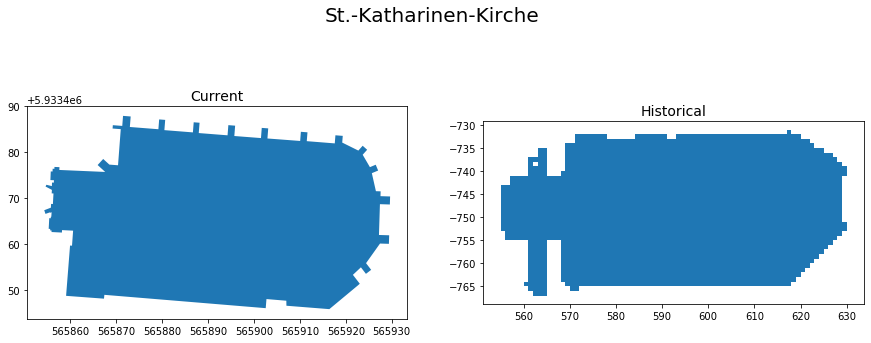

In [10]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.set_title('Current', fontsize=14)
ax2.set_title('Historical', fontsize=14)
plt.suptitle('St.-Katharinen-Kirche',fontsize=20)

StKatharinen_current.plot(ax=ax1)
StKatharinen_historical.plot(ax=ax2)

## 2.2) St.-Petri-Kirche

In [11]:
# Current St.-Petri-Kirche
StPetri_current_temp = current_churches[current_churches["name"] == "St.-Petri-Kirche"]
# as StPetri_current_temp has two entries, we manually select the right one
StPetri_current = StPetri_current_temp[StPetri_current_temp["fid"] == 276819]
StPetri_current

,fid,identifier,beginnt,advStandar,gebaeudefu,anzahlDerO,grundflaec,grundfla_1,AX_Datener,dachform,...,baujahr,dachart,bauweise,weitereGeb,AX_LI_Proc,CharacterS,CI_RoleCod,lageZurErd,sourceFile,geometry
228,276819.0,urn:adv:oid:DEHHALKAJ00011uJ,2014-03-10T06:32:11Z,DLKM,3041,1,2023.0,urn:adv:uom:m2,NaN,3100.0,...,None,None,NaN,None,None,NaN,None,None,ALKIS_HH_0123.xml,"POLYGON ((566003.984 5933973.427, 566004.912 5..."


In [12]:
# Historical St.-Petri-Kirche
StPetri_historical = historical_publicbuildings.loc[[1],'geometry']

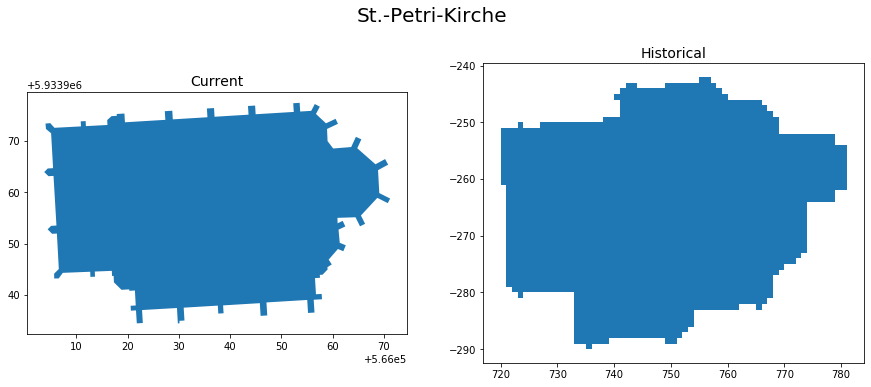

In [13]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.set_title('Current', fontsize=14)
ax2.set_title('Historical', fontsize=14)
plt.suptitle('St.-Petri-Kirche',fontsize=20)

StPetri_current.plot(ax=ax1)
StPetri_historical.plot(ax=ax2)

## 2.3) St.-Nikolai-Kirche

In [14]:
# ALKIS (current) St.-Nikolai-Kirche
StNikolai_current = current_churches[current_churches["name"] == "Mahnmal St. Nikolai"]
StNikolai_current

,fid,identifier,beginnt,advStandar,gebaeudefu,anzahlDerO,grundflaec,grundfla_1,AX_Datener,dachform,...,baujahr,dachart,bauweise,weitereGeb,AX_LI_Proc,CharacterS,CI_RoleCod,lageZurErd,sourceFile,geometry
177,214258.0,urn:adv:oid:DEHHALKAJ0000ovW,2014-03-10T06:32:11Z,DLKM,3041,1,487.0,urn:adv:uom:m2,NaN,4000.0,...,None,None,NaN,1120,None,NaN,None,None,ALKIS_HH_0122.xml,"POLYGON ((565630.558 5933641.014, 565630.519 5..."


In [15]:
# Lindley (historical) St.-Nikolai-Kirche
StNikolai_historical = historical_publicbuildings.loc[[5],'geometry']

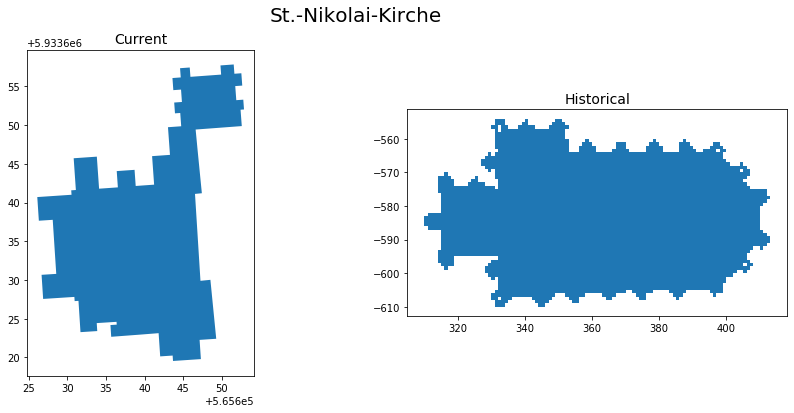

In [16]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.set_title('Current', fontsize=14)
ax2.set_title('Historical', fontsize=14)
plt.suptitle('St.-Nikolai-Kirche',fontsize=20)

StNikolai_current.plot(ax=ax1)
StNikolai_historical.plot(ax=ax2)

## 2.4) Rathaus

In [17]:
current_buildings = gpd.read_file("data\\Current_Buildings.shp") # UTM

In [18]:
# Current Rathaus
Rathaus_current = current_buildings[current_buildings["name"] == "Rathaus"]
Rathaus_current

,fid,identifier,beginnt,advStandar,gebaeudefu,anzahlDerO,grundflaec,grundfla_1,AX_Datener,dachform,...,baujahr,dachart,bauweise,weitereGeb,AX_LI_Proc,CharacterS,CI_RoleCod,lageZurErd,sourceFile,geometry
700,213687.0,urn:adv:oid:DEHHALKAJ0000pBE,2014-03-10T06:32:11Z,DLKM,3012,4.0,5430.0,urn:adv:uom:m2,NaN,5000.0,...,None,None,NaN,1060,None,NaN,None,NaN,ALKIS_HH_0122.xml,"POLYGON ((565734.257 5933915.733, 565733.869 5..."


In [19]:
# Historical Rathaus
Rathaus_historical = historical_publicbuildings.loc[[2],'geometry']

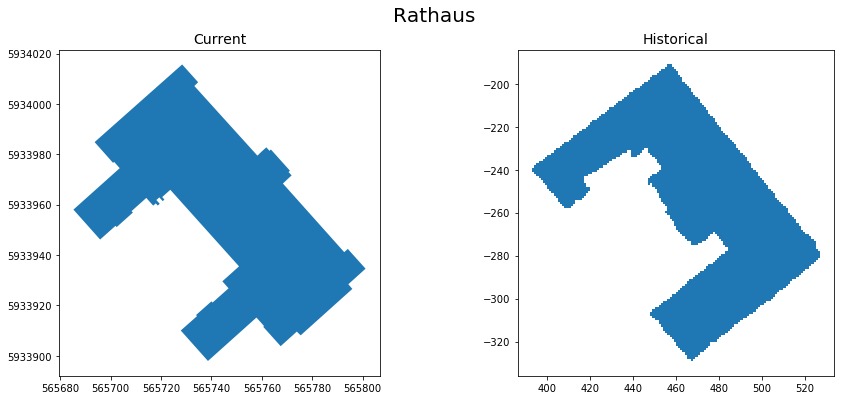

In [20]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.set_title('Current', fontsize=14)
ax2.set_title('Historical', fontsize=14)
plt.suptitle('Rathaus',fontsize=20)

Rathaus_current.plot(ax=ax1)
Rathaus_historical.plot(ax=ax2)

## 2.5) all churches & townhall

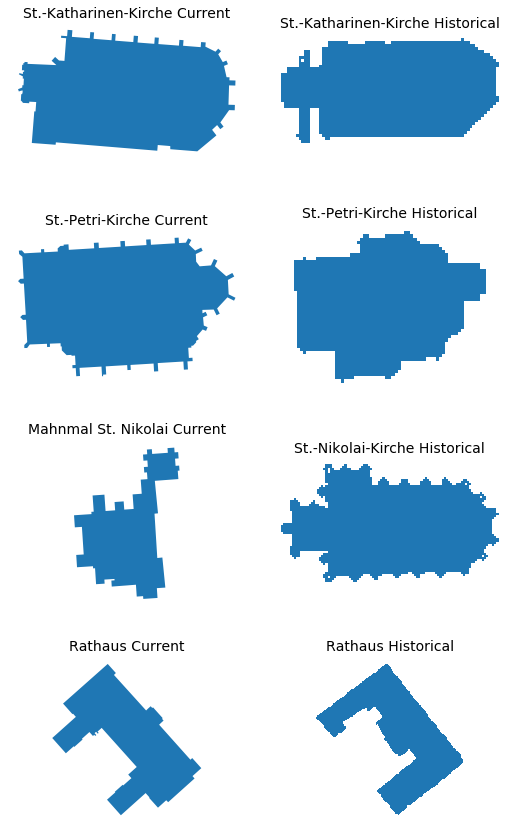

In [21]:
fig, axes = plt.subplots(figsize=(9, 15), ncols=2, nrows=4)

StKatharinen_current.plot(ax=axes[0][0])
axes[0][0].set_title('St.-Katharinen-Kirche Current', fontsize=14)
axes[0][0].axis('off')

StKatharinen_historical.plot(ax=axes[0][1])
axes[0][1].set_title('St.-Katharinen-Kirche Historical', fontsize=14)
axes[0][1].axis('off')

StPetri_current.plot(ax=axes[1][0])
axes[1][0].set_title('St.-Petri-Kirche Current', fontsize=14)
axes[1][0].axis('off')

StPetri_historical.plot(ax=axes[1][1])
axes[1][1].set_title('St.-Petri-Kirche Historical', fontsize=14)
axes[1][1].axis('off')

StNikolai_current.plot(ax=axes[2][0])
axes[2][0].set_title('Mahnmal St. Nikolai Current', fontsize=14)
axes[2][0].axis('off')

StNikolai_historical.plot(ax=axes[2][1])
axes[2][1].set_title('St.-Nikolai-Kirche Historical', fontsize=14)
axes[2][1].axis('off')

Rathaus_current.plot(ax=axes[3][0])
axes[3][0].set_title('Rathaus Current', fontsize=14)
axes[3][0].axis('off')

Rathaus_historical.plot(ax=axes[3][1])
axes[3][1].set_title('Rathaus Historical', fontsize=14)
axes[3][1].axis('off')

plt.subplots_adjust(hspace=0.3, wspace=0.1) # vertical (hspace) and horizontal (wspace) space between plots

# 3) Intersection over Union

## 3.1) Prepare data

First, we have to create an **envelope** of each geometrie to adjust the sizes of two corresponding geometries.
<br><img align="left" width="400" height="200" src="https://pro.arcgis.com/de/pro-app/2.8/tool-reference/data-management/GUID-EFBA5DB8-A161-4FE1-B2CB-792B65DC1469-web.png">
<br><br><br><br><br><br><br><br><br><br><br><br><br>
<span style="font-size:0.7em;">
    (source: https://pro.arcgis.com/de/pro-app/2.8/tool-reference/data-management/minimum-bounding-geometry.htm)</span>

### 3.1.1) Create envelope

In [22]:
env_StKatharinen_historical = StKatharinen_historical.envelope
env_StKatharinen_current = StKatharinen_current.envelope

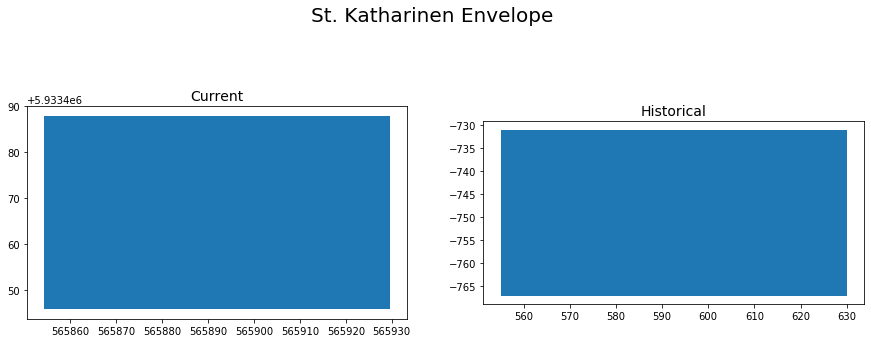

In [23]:
# plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

ax1.set_title('Current', fontsize=14)
ax2.set_title('Historical', fontsize=14)
plt.suptitle('St. Katharinen Envelope',fontsize=20)

env_StKatharinen_current.plot(ax=ax1)
env_StKatharinen_historical.plot(ax=ax2)

In [24]:
# convert GeoSeries to GeoDataFrame
env_gdf_StKatharinen_historical = gpd.GeoDataFrame(geometry=gpd.GeoSeries(env_StKatharinen_historical))
env_gdf_StKatharinen_current = gpd.GeoDataFrame(geometry=gpd.GeoSeries(env_StKatharinen_current))

In [25]:
# add id
env_gdf_StKatharinen_historical['id'] = range(1, len(env_gdf_StKatharinen_historical) + 1)
env_gdf_StKatharinen_current['id'] = range(1, len(env_gdf_StKatharinen_current) + 1)

### 3.1.2) Calculate side lengths of envelope polygons
source: https://stackoverflow.com/a/67942238

In [26]:
def calculatesidelengths(gdf):
    
    # Facts about polygon outer vertices
    # - first vertex is the same as the last
    # - to get segments, ignore zero-th point (use it as from_point in next row)
    # create basic lists for creation of new dataframe
    indx = []  # for A1, A3
    sequ = []  # for seg order
    pxy0 = []  # from-point
    pxy1 = []  # to-point
    
    for ix,geom in zip(gdf.id, gdf.geometry):
        num_pts = len(geom.exterior.xy[0])
        old_xy = []
        for inx, (x,y) in enumerate(zip(geom.exterior.xy[0],geom.exterior.xy[1])):
            if (inx==0):
                # first vertex is the same as the last
                pass
            else:
                indx.append(ix)
                sequ.append(inx)
                pxy0.append(Point(old_xy))
                pxy1.append(Point(x,y))
            old_xy = (x,y)

    # Create new geodataframe 
    polygon_segments  = gpd.GeoDataFrame({"poly_id": indx,
                     "vertex_id": sequ,
                     "from_point": pxy0,
                     "to_point": pxy1}, geometry="to_point")
    
    # Compute segment lengths
    # Note: seg length is Euclidean distance, ***not geographic***
    polygon_segments["seg_length"] = polygon_segments.apply(lambda row: row.from_point.distance(row.to_point), axis=1)
    return polygon_segments

In [27]:
sidelengths_historical = calculatesidelengths(env_gdf_StKatharinen_historical)
sidelengths_current = calculatesidelengths(env_gdf_StKatharinen_current)

## 3.2) Compare aspect ratio of the envelopes

In [28]:
# width
aspectratio_width = sidelengths_historical['seg_length'][0] / sidelengths_current['seg_length'][0]
# length
aspectratio_length = sidelengths_historical['seg_length'][1] / sidelengths_current['seg_length'][1]
print("Aspect ratio of \nwidth:", round(aspectratio_width, 3), ", height:", round(aspectratio_length, 3))

Aspect ratio of 
width: 0.995 , height: 0.855


## 3.3) Rasterize polygons
**This step was performed manually in QGIS**:<br><br>
1) export shape of church and corresponding envelope as shp and import in QGIS

In [29]:
# export geodataframes to shapefiles

StKatharinen_historical.to_file("data\StKatharinen_historical.shp", 
                             crs = {'init' :'epsg:25832'})

env_gdf_StKatharinen_historical.to_file("data\StKatharinen_historical_envelope.shp", 
                             crs = {'init' :'epsg:25832'})

StKatharinen_current.to_file("data\StKatharinen_current.shp", 
                           crs = {'init' :'epsg:25832'})

env_gdf_StKatharinen_current.to_file("data\StKatharinen_current_envelope.shp", 
                                   crs = {'init' :'epsg:25832'})

2) Union of church shape and envelope<br>

3) Rasterize (Vector to Raster): 
- Input layer: Union.shp
- Output Raster Size Units: Pixel
- Width/Horizontal & Height/Vertical resolution: 100
- Output extent: Union.shp
- Assign a specified nodata value to output bands: 9999
- Output: StKatharinen_current.tif / StKatharinen_historical.tif<br>

4) r.resample:
- Input: StKatharinen_current.tif / StKatharinen_historical.tif
- Region cellsize: e.g. 0.36 (smallest width or height from StKatharinen_current.tif and StKatharinen_historical.tif)
- Output (Resampled NN): St_Katharinen_current_resampled.tif / St_Katharinen_historical_resampled.tif

## 3.4) Compare aspect ratio of the raster images

In [32]:
StKatharinen_current_resampled = gdal.Open("data\St_Katharinen_current_resampled.tif")
StKatharinen_historical_resampled = gdal.Open("data\St_Katharinen_historical_resampled.tif")

# calculate width & height of raster images
current_width = StKatharinen_current_resampled.RasterXSize
current_height = StKatharinen_current_resampled.RasterYSize
historical_width = StKatharinen_historical_resampled.RasterXSize
historical_height = StKatharinen_historical_resampled.RasterYSize

# calculate aspect ratio
ar_width = historical_width/current_width
ar_height = historical_height/current_height

print("ALKIS:", StKatharinen_current_resampled.RasterXSize, "x", StKatharinen_current_resampled.RasterYSize,
      "\nLindley:", StKatharinen_historical_resampled.RasterXSize, "x", StKatharinen_historical_resampled.RasterYSize,
      "\n\nAspect ratio: Width:", round(ar_width, 3),
      ", Height:", round(ar_height, 3)
     )

ALKIS: 209 x 117 
Lindley: 208 x 100 

Aspect ratio: Width: 0.995 , Height: 0.855


### 3.4.1) Enlarge smaller raster image

In [33]:
# check width
if current_width != historical_width:
    if current_width < historical_width:
        print("width difference:", historical_width - current_width, "'0's must be added within current data")
    else:
        print("width difference:", current_width - historical_width, "'0's must be added within historical data")

# check height
if current_height != historical_height:
    if current_height < historical_height:
        print("height difference:", historical_height - current_height, "'0's must be added within current data")
    else:
        print("height difference:", current_height - historical_height, "'0's must be added within historical data")

width difference: 1 '0's must be added within historical data
height difference: 17 '0's must be added within historical data


In [35]:
# enlarge the smaller image

img = Image.open('data\St_Katharinen_historical_resampled.tif')

# case a): enlarge historical to the size of current
img = img.resize((current_width, current_height), Image.ANTIALIAS)
img.save('enlarged_multiclass.tif')

# TO DO: case b): enlarge current to the size of historical





In [36]:
# convert to only 2 classes

with rasterio.open('enlarged_multiclass.tif') as src: 
    
    # Read as numpy array
    array = src.read()
    profile = src.profile

    # Reclassify
    array[np.where(array == 0)] = 0
    array[np.where(array < 0)] = 1
    array[np.where(array > 0)] = 1
    # and so on ...  

crs = rasterio.crs.CRS({"init": "epsg:25832"})

with rasterio.open('enlarged_2class.tif', 'w', **profile) as dst:
    dst.crs = crs
    # Write to disk
    dst.write(array)

### 3.4.2) Get dimensions and cell size of both images
(historical and current)

In [50]:
current = StKatharinen_current_resampled
historical_enlarged = gdal.Open("enlarged_2class.tif")

# dimensions (w x h)
print("Current:", current.RasterXSize, "x", current.RasterYSize,
      "\nHistorical:", historical_enlarged.RasterXSize, "x", historical_enlarged.RasterYSize
     )

Current: 209 x 117 
Historical: 209 x 117


In [51]:
# cell size
gt_current = current.GetGeoTransform()
gt_historical_enlarged = historical_enlarged.GetGeoTransform()

print("Current:", gt_current[1], -gt_current[5], # x, y
      "\nHistorical:", gt_historical_enlarged[1], -gt_historical_enlarged[5]
     )

Current: 0.36056459330147106 0.3598888888875516 
Historical: 1.0 -1.0


### 3.4.3) Plot both raster files next to each other

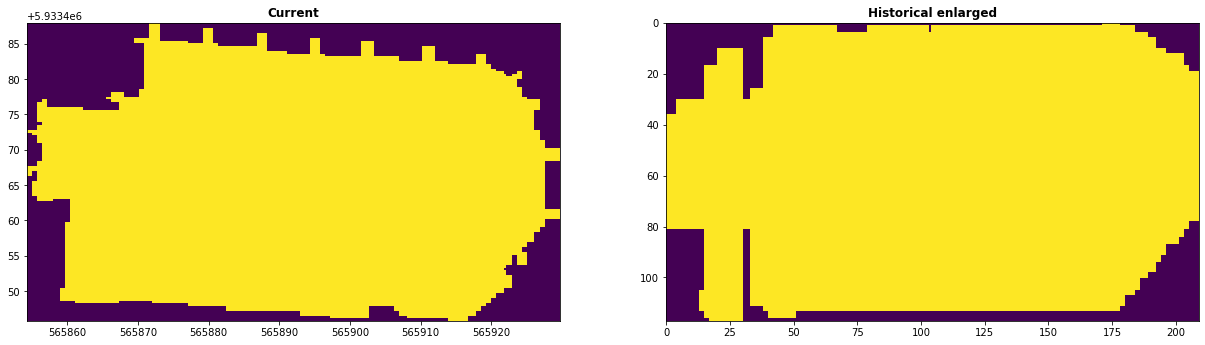

In [52]:
src1 = rasterio.open("data\St_Katharinen_current_resampled.tif")
src2 = rasterio.open("enlarged_2class.tif")

from matplotlib import pyplot
from rasterio.plot import show

fig, (axr, axg) = pyplot.subplots(1,2, figsize=(21,7))
show((src1, 1), ax=axr, title='Current')
show((src2, 1), ax=axg, title='Historical enlarged')

pyplot.show()

## 3.5) Intersection over Union

In [53]:
# read data as numpy array
Current = plt.imread("data\St_Katharinen_current_resampled.tif")
Historical = plt.imread("data\enlarged_2class.tif")

IoU of two binary masks
(source: https://stackoverflow.com/questions/66595055/fastest-way-of-computing-binary-mask-iou-with-numpy)

In [55]:
def binaryMaskIOU(mask1, mask2):
    mask1_area = np.count_nonzero(mask1 == 1)
    mask2_area = np.count_nonzero(mask2 == 1)
    intersection = np.count_nonzero(np.logical_and(mask1==1,  mask2==1))
    iou = intersection/(mask1_area+mask2_area-intersection)
    return iou
iou = binaryMaskIOU(Current, Historical)

print(round(iou*100, 1), "% overlap between current St. Katharinen and enlarged historical St. Katharinen")

83.9 % overlap between current St. Katharinen and enlarged historical St. Katharinen


# 4) Manual test
## 4.1) Visually

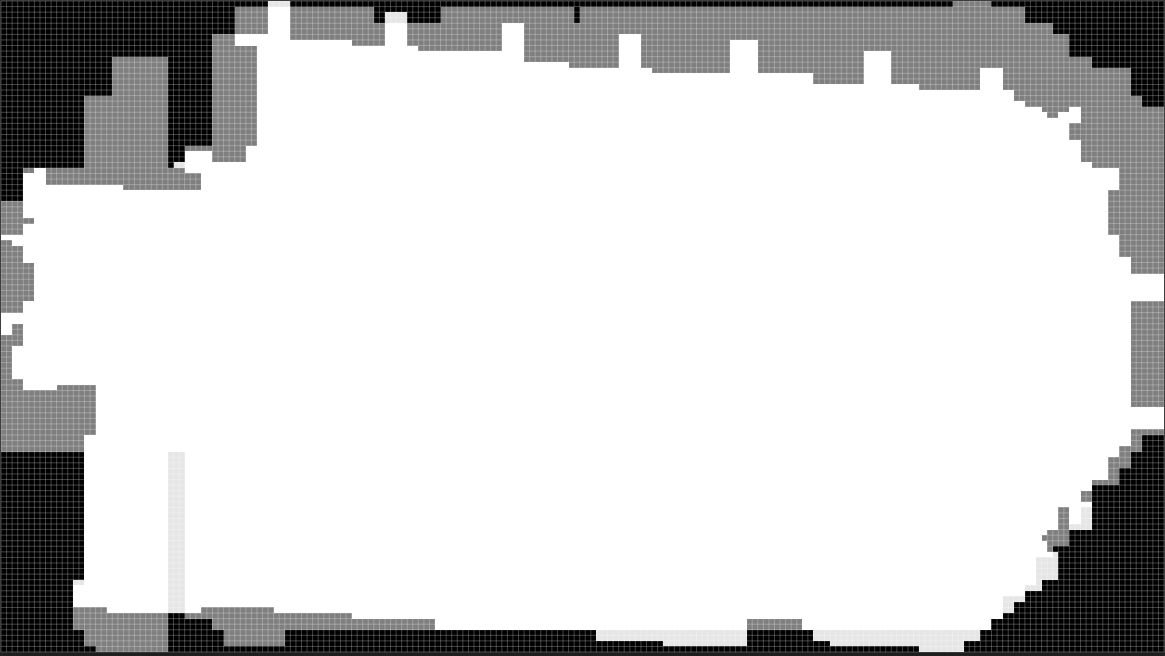

In [58]:
Image(filename="figures/Manual_check_overlay_StKatharinen.png", width=350)

## 4.2) Accuracy
Ratio of white pixels between the 2 churches

In [59]:
print(round(np.count_nonzero(Current == 1) / np.count_nonzero(Historical == 1) * 100, 2), "%")

86.5 %


# 5) Hausdorff Distance
This is a common similarity measure within pattern matching.

In [60]:
# convert numpy arrays to shapely

shapes_current = rasterio.features.shapes(Current)
current_poly = [shapely.geometry.Polygon(shape[0]["coordinates"][0]) for shape in shapes_current if shape[1] == 1]

shapes_historical = rasterio.features.shapes(Historical)
historical_poly = [shapely.geometry.Polygon(shape[0]["coordinates"][0]) for shape in shapes_historical if shape[1] == 1]

In [61]:
# convert to GeoDataFrames
crs = {'init': 'epsg:4326'}
Current_gdf = gpd.GeoDataFrame(crs=crs, geometry=current_poly)
Historical_gdf = gpd.GeoDataFrame(crs=crs, geometry=historical_poly)

In [62]:
# Hausdorff Distance
(Current_gdf.geometry.values[0]).hausdorff_distance(Historical_gdf.geometry.values[0])

126.0

# 6) IoU with other geometries
in order to show the lower IoC (in comparison to the 2 corresponding counterparts)
## 6.1) Example: St. Katharinen Lindley with Mahnmal St. Nikolai ALKIS

### 6.1.1) Prepare data
Import St. Nikolai

In [65]:
# Current St.-Nikolai-Kirche
StNikolai_current = current_churches[current_churches["name"] == "Mahnmal St. Nikolai"]

Create envelope

In [66]:
env_StNikolai_current = StNikolai_current.envelope

In [67]:
# create GeoDataFrame
env_gdf_StNikolai_current = gpd.GeoDataFrame(geometry=gpd.GeoSeries(env_StNikolai_current))

# add id
env_gdf_StNikolai_current['id'] = range(1, len(env_gdf_StNikolai_current) + 1)

### 6.1.2) Rasterize polygons
**We did this manually in QGIS** (see above)

In [68]:
StNikolai_current.to_file("data\StNikolai_current.shp",
                       crs = {'init' :'epsg:25832'})

env_gdf_StNikolai_current.to_file("data\StNikolai_current_envelope.shp",
                               crs = {'init' :'epsg:25832'})

### 6.1.3) Compare aspect ratio of the raster images

In [69]:
StNikolai_current_resampled = gdal.Open("data\St_Nikolai_current_resampled.tif")
StKatharinen_historical_resampled = gdal.Open("data\St_Katharinen_historical_resampled_for_St_Nikolai_current.tif")

# calculate width & height of raster images
current_width = StNikolai_current_resampled.RasterXSize
current_height = StNikolai_current_resampled.RasterYSize
historical_width = StKatharinen_historical_resampled.RasterXSize
historical_height = StKatharinen_historical_resampled.RasterYSize

# calculate aspect ratio
ar_width = historical_width/current_width
ar_height = historical_height/current_height

if ar_width < 1 and ar_height < 1:
    ar_width = ar_width
    ar_height = ar_height
elif ar_width > 1 and ar_height > 1:
    ar_width = current_width/historical_width
    ar_height = current_height/historical_height
    
print("Current:", current_width, "x", current_height,
          "\nLindley:", historical_width, "x", historical_height,
          "\n\nAspect ratio: Width:", round(ar_width, 3),
          ", Height:", round(ar_height, 3)
         )

Current: 1000 x 1434 
Lindley: 2809 x 1348 

Aspect ratio: Width: 2.809 , Height: 0.94


### enlarge smaller raster image

In [70]:
# enlarge the smaller image

# # case b): enlarge current to the size of historical
ds = gdal.Open('data\St_Nikolai_current_resampled.tif')
gdal.Translate('data\St_Nikolai_enlarged_multiclass.tif', ds, width=historical_width, height=historical_height, scaleParams=[[]])

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x000001BB6239FAB0> >

In [71]:
# convert to only 2 classes

with rasterio.open('data\St_Nikolai_enlarged_multiclass.tif') as src:    
    # Read as numpy array
    array = src.read()
    profile = src.profile

    # Reclassify
    array[np.where(array == 0)] = 0
    array[np.where(array < 0)] = 1
    array[np.where(array > 0)] = 1 

crs = rasterio.crs.CRS({"init": "epsg:25832"})

with rasterio.open('data\St_Nikolai_enlarged_2class.tif', 'w', **profile) as dst:
    dst.crs = crs
    # Write to disk
    dst.write(array)

### 6.1.4) Get dimensions and cell size of both images

In [72]:
Historical = StKatharinen_historical_resampled
Current_enlarged = gdal.Open("data\St_Nikolai_enlarged_2class.tif")

# dimensions (w x h)
print("Current:", Current_enlarged.RasterXSize, "x", Current_enlarged.RasterYSize,
      "\nHistorical:", Historical.RasterXSize, "x", Historical.RasterYSize
     )

Current: 2809 x 1348 
Historical: 2809 x 1348


In [73]:
# cell size
gt_Historical = Historical.GetGeoTransform()
gt_Current_enlarged = Current_enlarged.GetGeoTransform()

print("Historical:", gt_Historical[1], -gt_Historical[5], # x, y
      "\nCurrent:", gt_Current_enlarged[1], -gt_Current_enlarged[5]
     )

Historical: 0.026699893200427198 0.026706231454005934 
Current: 0.009505873976521334 0.02841246290787369


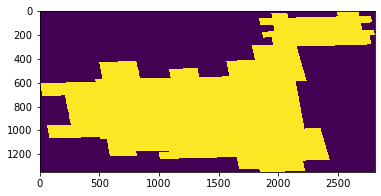

In [74]:
# Plot
ds = rasterio.open('data\St_Nikolai_enlarged_2class.tif')
plt.imshow(ds.read(1))
plt.show()

### 6.1.5) IoU

In [75]:
# read data as numpy array
ds1 = gdal.Open("data\St_Nikolai_enlarged_2class.tif")
Current = np.array(ds1.GetRasterBand(1).ReadAsArray())

ds2 = gdal.Open("data\St_Katharinen_historical_resampled_for_St_Nikolai_current.tif")
Historical = np.array(ds2.GetRasterBand(1).ReadAsArray())

# IoU
iou = binaryMaskIOU(Current, Historical)
print(round(iou*100, 1), "% overlap between enlarged current St. Nikolai and historical St. Katharinen")

54.0 % overlap between enlarged current St. Nikolai and historical St. Katharinen


### 6.1.6) Manual Test
Visually

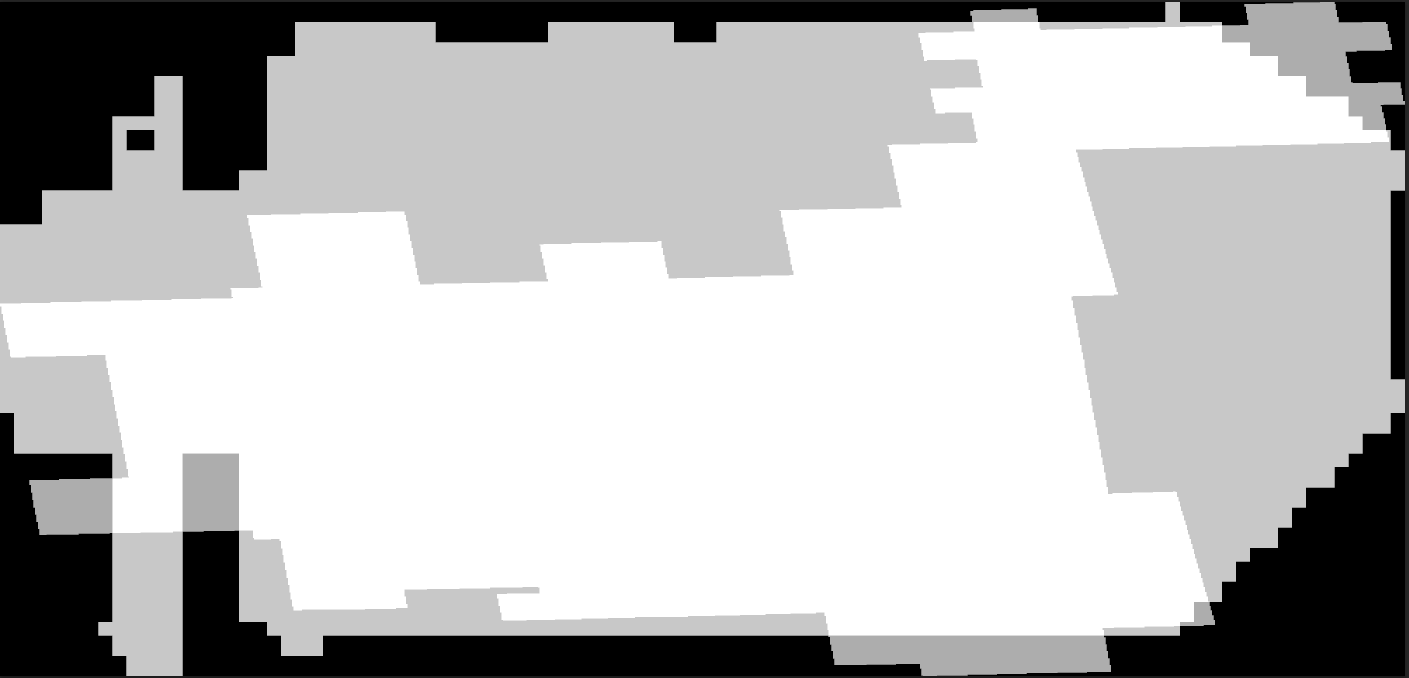

In [76]:
Image(filename="figures/Manual_check_overlay_StKatharinen-historical_StNikolai-current.PNG", width=350)

### 6.1.7) Hausdorff Distance

In [77]:
# convert numpy arrays to shapely

shapes_current = rasterio.features.shapes(Current)
current_poly = [shapely.geometry.Polygon(shape[0]["coordinates"][0]) for shape in shapes_current if shape[1] == 1]

shapes_historical = rasterio.features.shapes(Historical)
historical_poly = [shapely.geometry.Polygon(shape[0]["coordinates"][0]) for shape in shapes_historical if shape[1] == 1]

In [78]:
# convert to GDFs 
crs = {'init': 'epsg:4326'}
current_gdf = gpd.GeoDataFrame(crs=crs, geometry=current_poly)
historical_gdf = gpd.GeoDataFrame(crs=crs, geometry=historical_poly)

In [83]:
# Hausdorff Distance
(current_gdf.geometry.values[0]).hausdorff_distance(historical_gdf.geometry.values[0])

576.805859887016

**All steps within 6.1) were also performed for current St. Petri, St. Jacobi, and Rathaus**.